### A Comparison of Gentrification in Williamsburg and Forest Hills

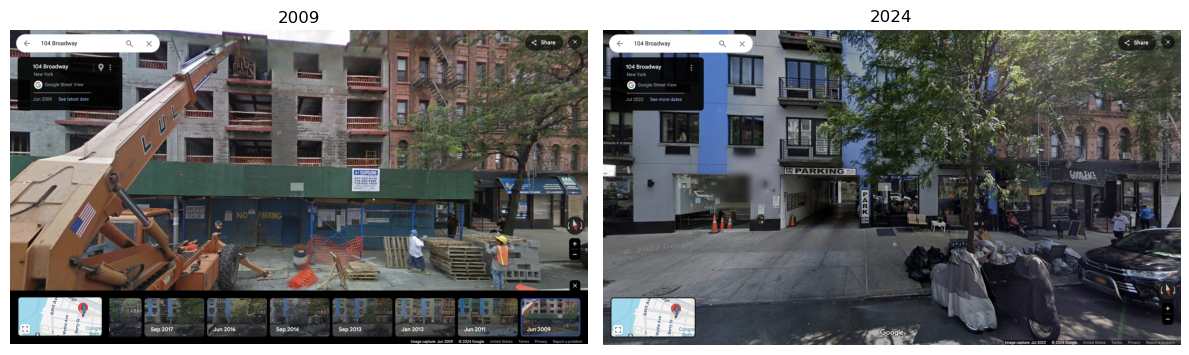

In [69]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1 = mpimg.imread('./photos/williamsburg_2009.png')  
img2 = mpimg.imread('./photos/williamsburg_2024.png')  


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First image
axes[0].imshow(img1)
axes[0].axis('off')  # Hide axes
axes[0].set_title('2009')  # Title for the first image

# Second image
axes[1].imshow(img2)
axes[1].axis('off')  # Hide axes
axes[1].set_title('2024')  # Title for the second image


plt.tight_layout()
plt.show()

To gather home value data for this project, we used data compiled by Zillow and an API provided by the Nasdaq Data Link:

In [19]:
import requests, pandas as pd
williamsburg_url = "https://data.nasdaq.com/api/v3/datatables/ZILLOW/REGIONS?region_id=199001&api_key=sMdx1o24iu796i7489fQ"
response = requests.get(williamsburg_url)
williamsburg_region = response.json()

Zillow compiles its data into multiple data tables, and so we first had to check the documentation for the data to find the unique region id for Williamsburg and Foresthills and then we placed a call for a dataset that contained specific data on the regions (unique id's for the region and the region's name) for which the home value data is available in the API. 

In [151]:
data_list = williamsburg_region['datatable']['data']
columns = ['region_id', 'region_type', 'region']
df = pd.DataFrame(data_list, columns=columns)
details_split = df['region'].str.split(';', expand=True)
detail_columns = ['Zip Code', 'State', 'City 1', 'City 2', 'County']
details_split.columns = detail_columns
df = pd.concat([df.drop(columns=['region']), details_split], axis=1)
df

,region_id,region_type,Zip Code,State,City 1,City 2,County
0,199001,neigh,Williamsburg,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Kings County


In [153]:
williamsburg_data = "https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA?&region_id=199001&api_key=sMdx1o24iu796i7489fQ"

response2 = requests.get(williamsburg_data)
file2 = response2.json()
data_list2 = file2['datatable']['data']

columns2 = ['Code', 'region_id', 'Date', 'Value']

df2 = pd.DataFrame(data_list2, columns=columns2)
df2

,Code,region_id,Date,Value
0,ZSFH,199001,2024-07-31,1.642872e+06
1,ZSFH,199001,2024-06-30,1.639676e+06
2,ZSFH,199001,2024-05-31,1.635438e+06
3,ZSFH,199001,2024-04-30,1.618527e+06
4,ZSFH,199001,2024-03-31,1.606680e+06
...,...,...,...,...
2624,Z1BR,199001,2000-05-31,1.219724e+05
2625,Z1BR,199001,2000-04-30,1.220259e+05
2626,Z1BR,199001,2000-03-31,1.211567e+05
2627,Z1BR,199001,2000-02-29,1.213079e+05


In [118]:
williamsburg = pd.merge(df, df2, on='region_id', how='inner')
williamsburg

,region_id,region_type,Zip Code,State,City 1,City 2,County,Code,Date,Value
0,199001,neigh,Williamsburg,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Kings County,ZSFH,2024-07-31,1.642872e+06
1,199001,neigh,Williamsburg,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Kings County,ZSFH,2024-06-30,1.639676e+06
2,199001,neigh,Williamsburg,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Kings County,ZSFH,2024-05-31,1.635438e+06
3,199001,neigh,Williamsburg,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Kings County,ZSFH,2024-04-30,1.618527e+06
4,199001,neigh,Williamsburg,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Kings County,ZSFH,2024-03-31,1.606680e+06
...,...,...,...,...,...,...,...,...,...,...
2624,199001,neigh,Williamsburg,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Kings County,Z1BR,2000-05-31,1.219724e+05
2625,199001,neigh,Williamsburg,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Kings County,Z1BR,2000-04-30,1.220259e+05
2626,199001,neigh,Williamsburg,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Kings County,Z1BR,2000-03-31,1.211567e+05
2627,199001,neigh,Williamsburg,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Kings County,Z1BR,2000-02-29,1.213079e+05


After we had received the region data, we then placed a call for the dataset containing home-value by year. This dataset only contained home-value information by year and region id, and so we performed an inner join on both dataframes to receive the following, comprehensive dataframe:

In [122]:
williamsburg['Date'] = pd.to_datetime(williamsburg['Date'])
williamsburg = williamsburg.sort_values(by='Date')
williamsburg

,region_id,region_type,Zip Code,State,City 1,City 2,County,Code,Date,Value
1647,199001,neigh,Williamsburg,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Kings County,Z4BR,1996-01-31,2.345240e+05
2333,199001,neigh,Williamsburg,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Kings County,Z2BR,1996-01-31,1.945540e+05
980,199001,neigh,Williamsburg,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Kings County,ZALL,1996-01-31,1.300970e+05
1304,199001,neigh,Williamsburg,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Kings County,Z5BR,1996-01-31,3.519420e+05
637,199001,neigh,Williamsburg,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Kings County,ZCON,1996-01-31,1.331390e+05
...,...,...,...,...,...,...,...,...,...,...
2334,199001,neigh,Williamsburg,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Kings County,Z1BR,2024-07-31,9.546323e+05
1648,199001,neigh,Williamsburg,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Kings County,Z3BR,2024-07-31,1.949365e+06
638,199001,neigh,Williamsburg,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Kings County,ZALL,2024-07-31,1.084402e+06
295,199001,neigh,Williamsburg,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Kings County,ZCON,2024-07-31,1.066007e+06


As seen above, our data goes back to 1996. According to research by Peter J. Hutchins of West-Chester University, it was from 1990 to 2012 that there emerged an influx of high-income white homeowners, throughout Brooklyn. This means that the year 1996 could form a fairly reliable base-year, as this would be right as gentrification was occuring in the neighborhood. First, we carry out some summary statistics on 1996 home-values in Williamsburg: 

In [124]:
williamsburg_1996 = williamsburg[williamsburg['Date'].dt.year == 1996]
williamsburg_1996_stats = williamsburg_1996[['Value']].agg(['min', 'max', 'median', 'mean'])
print(williamsburg_1996_stats)

                Value
min     127921.000000
max     361934.000000
median  213850.500000
mean    225952.347222


Our data goes all the way to 2024, and so we can form comparisons between the two years: 

In [126]:
williamsburg_2024 = williamsburg[williamsburg['Date'].dt.year == 2024]
williamsburg_2024_stats = williamsburg_2024[['Value']].agg(['min', 'max', 'median', 'mean'])
print(williamsburg_2024_stats)

               Value
min     9.411791e+05
max     2.197346e+06
median  1.425807e+06
mean    1.463307e+06


From this, we see that the change in median home-values from 1996 to 2024 is almost 566%! According to the U.S. Bureau of Labor Statistics, \$213,850 would have equivalent buying power to \$425,398 in 2024. This 98% decrease in buying power can certainly not account for more than a 500% change in the home-value prices, but according to Homefinancing, the rise in home-prices in the US significantly outpace price inflation, so this is not an unexpected result. However, according to data from the U.S. Bureau of Labor Statistics, median home prices nationwide have increased by 229%, whereas New York's median home prices have increased by x%, which would definitely make the rise in Williamsburg's home prices higher than nation state wide trends. 

Another major characterization of gentrification is a rise in the median income of a neighborhood due to an influx of high-income individuals/household to that neighborhood. Next, using data obtained from the tidycensus package available in R, we will compare the change in median income from 1996 to 2024 in both Williamsburg and Forest Hills from 1996-2024. Unfortunately, the United States Census data did not begin data collection until 2009, and has not published data for 2024- so we are limited to analysing income with home value from 2009-2023. It's also important to note that this is county data, so it might not be entirely accurate. 

In [168]:
median_income_data_william = pd.read_csv("median_income_williamsburg.csv")
median_income_data_william

,GEOID,NAME,B19013_001E,B19013_001M,year
36047,Kings County,New York,42894,370,2009
36047,Kings County,New York,43567,444,2010
36047,Kings County,New York,44593,404,2011
36047,Kings County,New York,45215,420,2012
36047,Kings County,New York,46085,477,2013
36047,Kings County,New York,46958,433,2014
36047,Kings County,New York,48201,419,2015
36047,Kings County,New York,50640,322,2016
36047,Kings County,New York,52782,467,2017
36047,Kings County,New York,56015,536,2018


**From the tables above, we gather the following information:**

**Median income in Kings County:**

- **2009:** \$42,829
- **2023:** \$78,548

From this data, we can observe an 83% change in median income in the county that Williamsburg is located in. 

In [41]:
forest_hills_url = "https://data.nasdaq.com/api/v3/datatables/ZILLOW/REGIONS?region_id=273757&api_key=sMdx1o24iu796i7489fQ"
response = requests.get(forest_hills_url)
forest_hills_region = response.json()

data_list = forest_hills_region['datatable']['data']
columns = ['region_id', 'region_type', 'region']
df = pd.DataFrame(data_list, columns=columns)

details_split = df['region'].str.split(';', expand=True)
detail_columns = ['Zip Code', 'State', 'City 1', 'City 2', 'County']
details_split.columns = detail_columns
df = pd.concat([df.drop(columns=['region']), details_split], axis=1)

forest_hills_data_url = "https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA?&region_id=273757&api_key=sMdx1o24iu796i7489fQ"
response2 = requests.get(forest_hills_data_url)
file2 = response2.json()

data_list2 = file2['datatable']['data']
columns2 = ['Code', 'region_id', 'Date', 'Value']
df2 = pd.DataFrame(data_list2, columns=columns2)

In [47]:
forest_hill = pd.merge(df, df2, on="region_id", how="inner")
forest_hill

,region_id,region_type,Zip Code,State,City 1,City 2,County,Code,Date,Value
0,273757,neigh,Forest Hills,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Queens County,ZSFH,2024-07-31,1.210271e+06
1,273757,neigh,Forest Hills,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Queens County,ZSFH,2024-06-30,1.210380e+06
2,273757,neigh,Forest Hills,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Queens County,ZSFH,2024-05-31,1.207467e+06
3,273757,neigh,Forest Hills,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Queens County,ZSFH,2024-04-30,1.196302e+06
4,273757,neigh,Forest Hills,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Queens County,ZSFH,2024-03-31,1.184844e+06
...,...,...,...,...,...,...,...,...,...,...
2739,273757,neigh,Forest Hills,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Queens County,Z1BR,1996-05-31,9.387700e+04
2740,273757,neigh,Forest Hills,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Queens County,Z1BR,1996-04-30,9.371700e+04
2741,273757,neigh,Forest Hills,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Queens County,Z1BR,1996-03-31,9.394300e+04
2742,273757,neigh,Forest Hills,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Queens County,Z1BR,1996-02-29,9.376300e+04


In [51]:
forest_hill['Date'] = pd.to_datetime(forest_hill['Date'])
forest_hill = forest_hill.sort_values(by='Date')
forest_hill

,region_id,region_type,Zip Code,State,City 1,City 2,County,Code,Date,Value
1371,273757,neigh,Forest Hills,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Queens County,Z5BR,1996-01-31,3.856790e+05
2400,273757,neigh,Forest Hills,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Queens County,Z2BR,1996-01-31,1.300190e+05
2057,273757,neigh,Forest Hills,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Queens County,Z3BR,1996-01-31,2.418660e+05
1714,273757,neigh,Forest Hills,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Queens County,Z4BR,1996-01-31,3.266370e+05
1028,273757,neigh,Forest Hills,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Queens County,ZALL,1996-01-31,1.174690e+05
...,...,...,...,...,...,...,...,...,...,...
686,273757,neigh,Forest Hills,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Queens County,ZALL,2024-07-31,4.875122e+05
2401,273757,neigh,Forest Hills,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Queens County,Z1BR,2024-07-31,3.303542e+05
343,273757,neigh,Forest Hills,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Queens County,ZCON,2024-07-31,3.842282e+05
1372,273757,neigh,Forest Hills,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Queens County,Z4BR,2024-07-31,1.649534e+06


In [55]:
forest_hill_1996 = forest_hill[forest_hill['Date'].dt.year == 1996]
forest_hill_1996_stats = forest_hill_1996[['Value']].agg(['min', 'max', 'median', 'mean'])
print(forest_hill_1996_stats)

                Value
min      92588.000000
max     397790.000000
median  184768.500000
mean    211286.260417


In [53]:
forest_hill_2024 = forest_hill[forest_hill['Date'].dt.year == 2024]
forest_hill_2024_stats = forest_hill_2024[['Value']].agg(['min', 'max', 'median', 'mean'])
print(forest_hill_2024_stats)

               Value
min     3.244643e+05
max     2.241216e+06
median  7.527711e+05
mean    9.633371e+05


In [165]:
median_income_data_forest = pd.read_csv("median_income_forest_hills.csv")
median_income_data_forest

,GEOID,NAME,B19013_001E,B19013_001M,year
36081,Queens County,New York,54870,488,2009
36081,Queens County,New York,55291,482,2010
36081,Queens County,New York,56406,570,2011
36081,Queens County,New York,56780,450,2012
36081,Queens County,New York,57001,532,2013
36081,Queens County,New York,57210,508,2014
36081,Queens County,New York,57720,552,2015
36081,Queens County,New York,59758,546,2016
36081,Queens County,New York,62008,471,2017
36081,Queens County,New York,64987,663,2018


In [163]:
median_income_data_william = pd.read_csv("median_income_williamsburg.csv")
median_income_data_william

,GEOID,NAME,B19013_001E,B19013_001M,year
36047,Kings County,New York,42894,370,2009
36047,Kings County,New York,43567,444,2010
36047,Kings County,New York,44593,404,2011
36047,Kings County,New York,45215,420,2012
36047,Kings County,New York,46085,477,2013
36047,Kings County,New York,46958,433,2014
36047,Kings County,New York,48201,419,2015
36047,Kings County,New York,50640,322,2016
36047,Kings County,New York,52782,467,2017
36047,Kings County,New York,56015,536,2018


**From the table above, we gather the following information:**

**Median income in Queens County:**

- **2009:** \$54,870
- **2023:** \$84,961

In [128]:
william_2009 = williamsburg[williamsburg['Date'].dt.year == 2009]
william_2009_median = william_2009[['Value']].agg(['median'])
print(william_2009_median)

william_2023 = williamsburg[williamsburg['Date'].dt.year == 2023]
william_2023_median = william_2023[['Value']].agg(['median'])
print(william_2023_median)

                Value
median  681518.585134
               Value
median  1.410196e+06


In [130]:
forest_hill_2009 = forest_hill[forest_hill['Date'].dt.year == 2009]
forest_hill_2009_median = forest_hill_2009[['Value']].agg(['median'])
print(forest_hill_2009_median)

forest_hill_2023 = forest_hill[forest_hill['Date'].dt.year == 2023]
forest_hill_2023_median = forest_hill_2023[['Value']].agg(['median'])
print(forest_hill_2023_median)

                Value
median  450622.676992
                Value
median  795018.860753
